In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df = df.rename(columns={'cement':'cement','blast_furnace_slag':'slag', 'fly_ash':'ash',
                        'water':'water', 'superplasticizer':'superplasticizer',
                        'coarse_aggregate':'coarseagg', 'fine_aggregate':'fineagg',
                        'age': 'age', 'concrete_compressive_strength':'strength'})

In [ ]:
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fine_aggregate      float64
age                   int64
strength            float64
dtype: object

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fine_aggregate      0
age                 0
strength            0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [ ]:
from scipy import stats
print('Inter Quartile Range (IQR) is: ', stats.iqr(df['cement']))

Inter Quartile Range (IQR) is:  157.625


In [ ]:
Q1 = df['cement'].quantile(q=0.25)
Q3 = df['cement'].quantile(q=0.75)

L_outliers = Q1 - (1.5 * (Q3 - Q1))
U_outliers = Q3 + (1.5 * (Q3 - Q1))

print('Lower outliers limit in cement: ', L_outliers)
print('Upper outliers limit in cement: ', U_outliers)

Lower outliers limit in cement:  -44.0625
Upper outliers limit in cement:  586.4375


In [ ]:
print(Q3 - Q1)

157.625


In [ ]:
print('Number of outliers in cement lower : ', df[df['cement'] < -44.0625 ]['cement'].count())
print('Number of outliers in cement upper : ', df[df['cement'] > 586.4375 ]['cement'].count())

print('percent of outliers in cement lower is : ', round(df[df['cement'] < -44.0625 ]['cement'].count() * 100 / len(df),2), '%')
print('percent of outliers in cement upper is : ', round(df[df['cement'] > 586.4375 ]['cement'].count() * 100 / len(df),2), '%')

Number of outliers in cement lower :  0
Number of outliers in cement upper :  0
percent of outliers in cement lower is :  0.0 %
percent of outliers in cement upper is :  0.0 %


<Axes: xlabel='cement'>

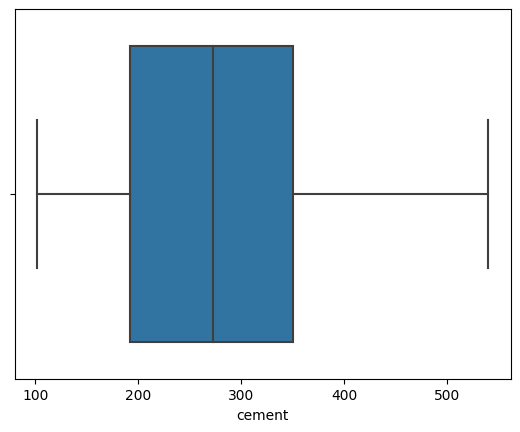

In [ ]:
sns.boxplot(x='cement', data=df, orient='h')

Text(0.5, 1.0, 'ash')

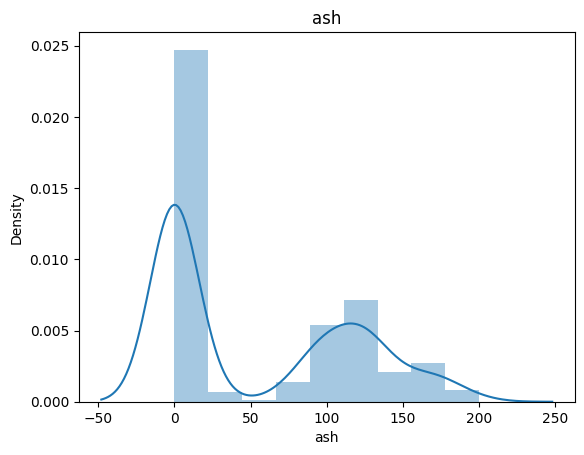

In [ ]:
sns.distplot(df['ash']).set_title('ash')

we can do this analysis for all columns

In [ ]:
# fig , ax = plt.subplots(3,3, figsize=(16,16))
# sns.distplot(df['cement'], ax=ax[0][0])
# sns.distplot(df['slag'], ax=ax[0][1])
# sns.distplot(df['ash'], ax=ax[0][2])
# sns.distplot(df['water'], ax=ax[1][0])
# sns.distplot(df['superplasticizer'], ax=ax[1][1])
# sns.distplot(df['coarseagg'], ax=ax[1][2])
# sns.distplot(df['fine_aggregate'], ax=ax[2][0])
# sns.distplot(df['age'], ax=ax[2][1])
# sns.distplot(df['strength'], ax=ax[2][2])

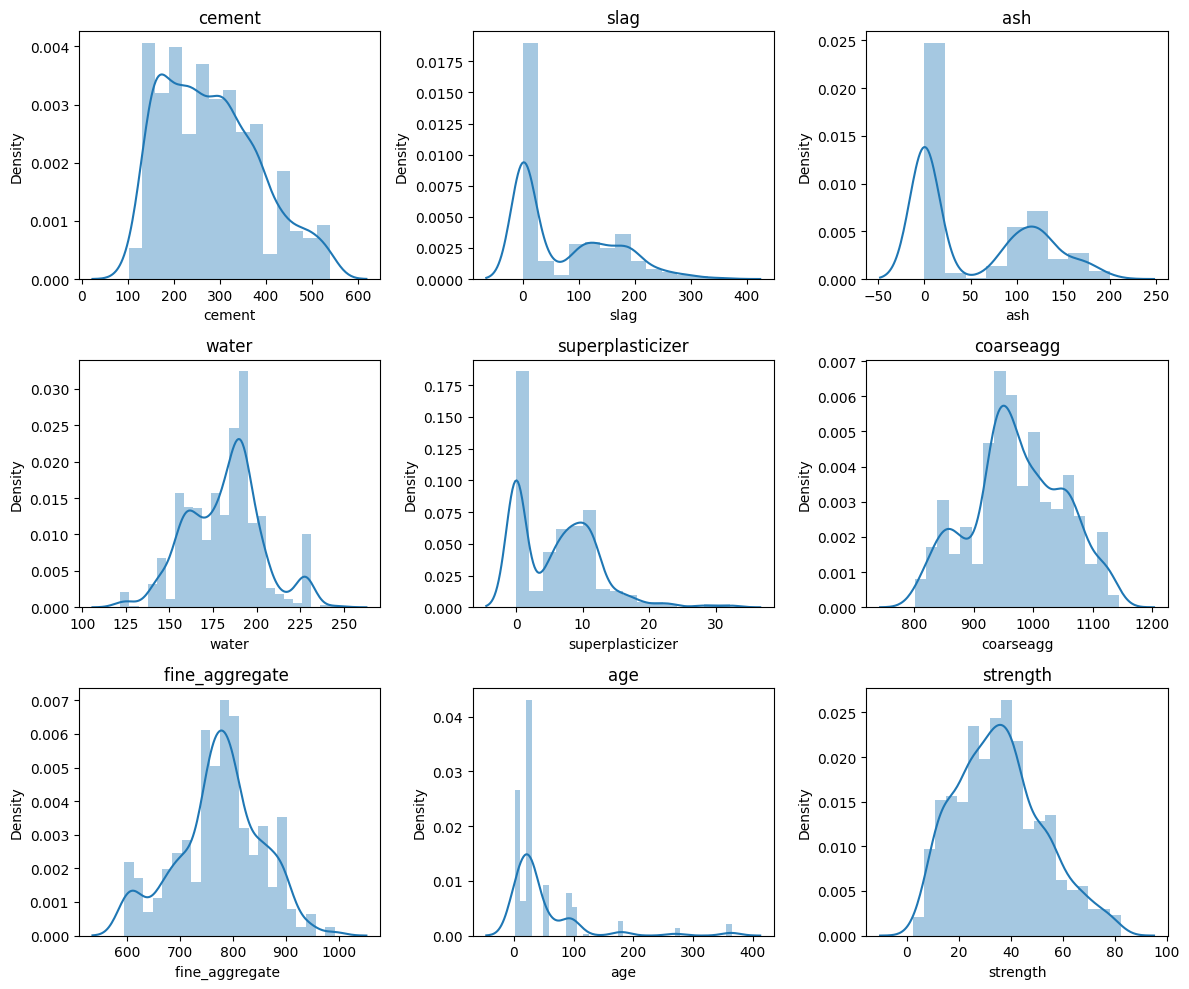

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.distplot(df[col], ax=axes[i])

for ax, col in zip(axes, df.columns):
    ax.set_title(col)

plt.tight_layout()
plt.show()

# plt.tight_layout() is a function in Matplotlib that adjusts the spacing between subplots to prevent overlap and improve the overall layout of the plot

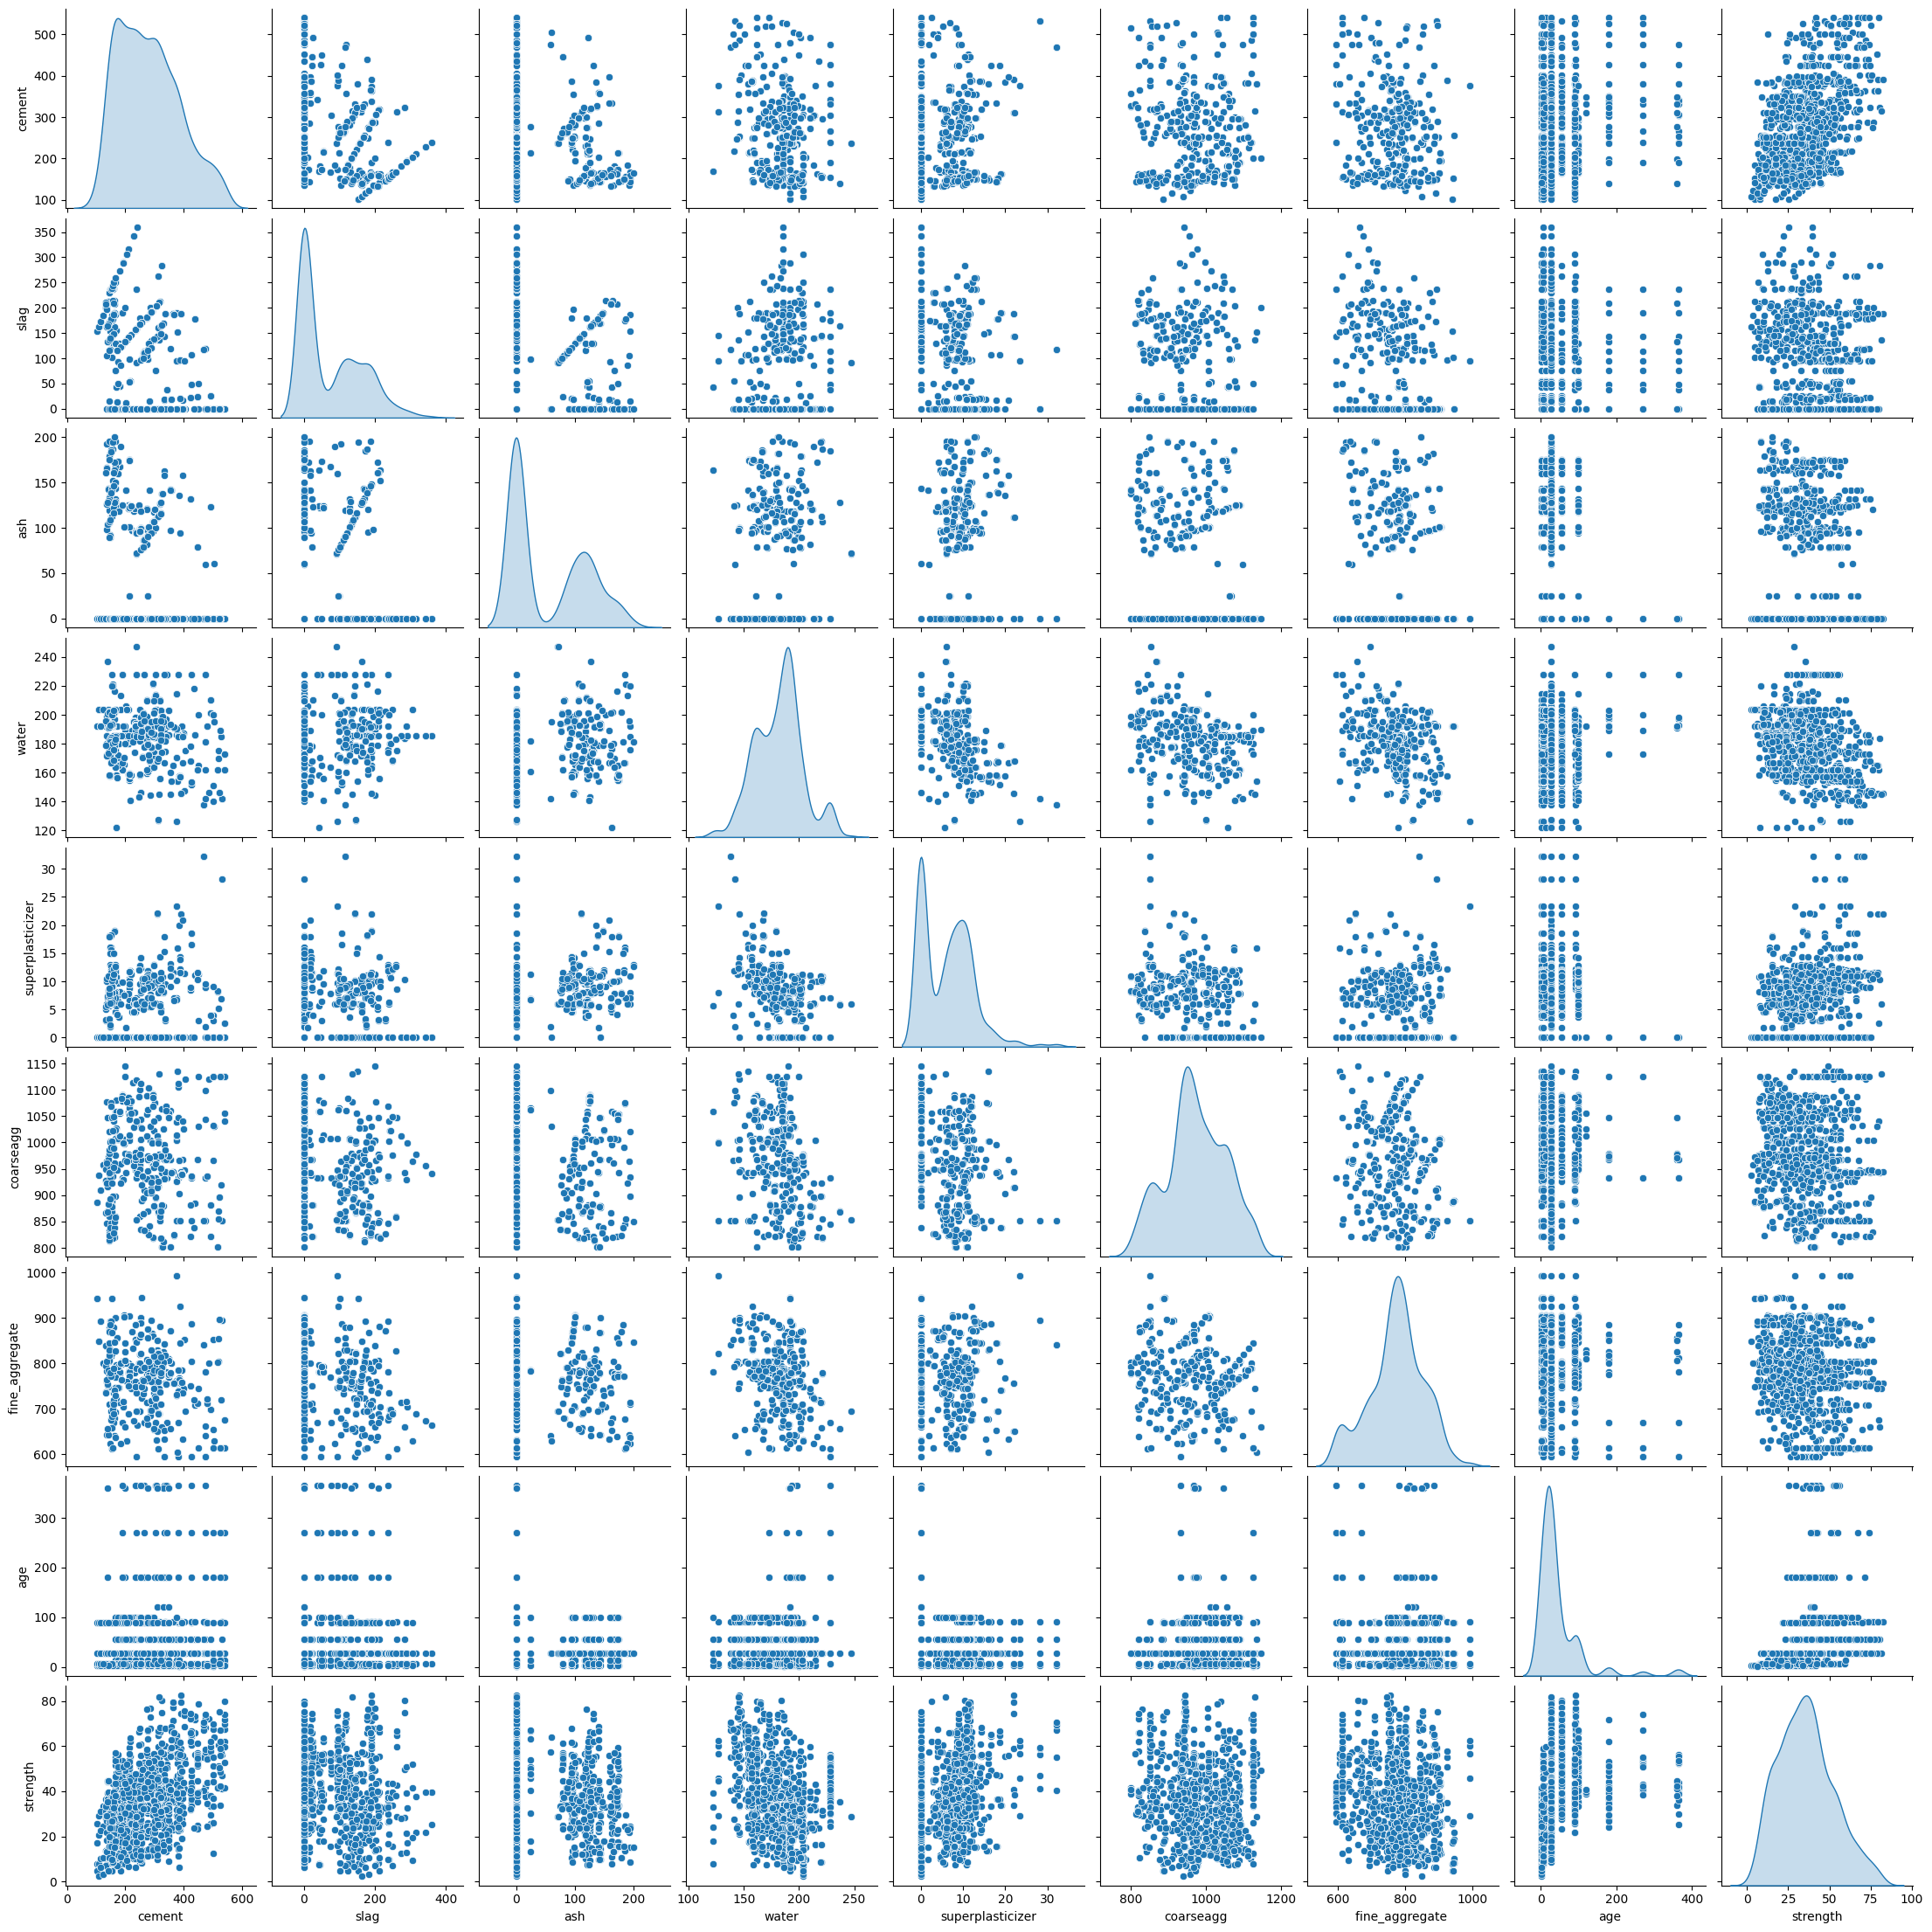

In [ ]:
sns.pairplot(df, diag_kind='kde')
# correlation

In [ ]:
df.corr()

,cement,slag,ash,water,superplasticizer,coarseagg,fine_aggregate,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


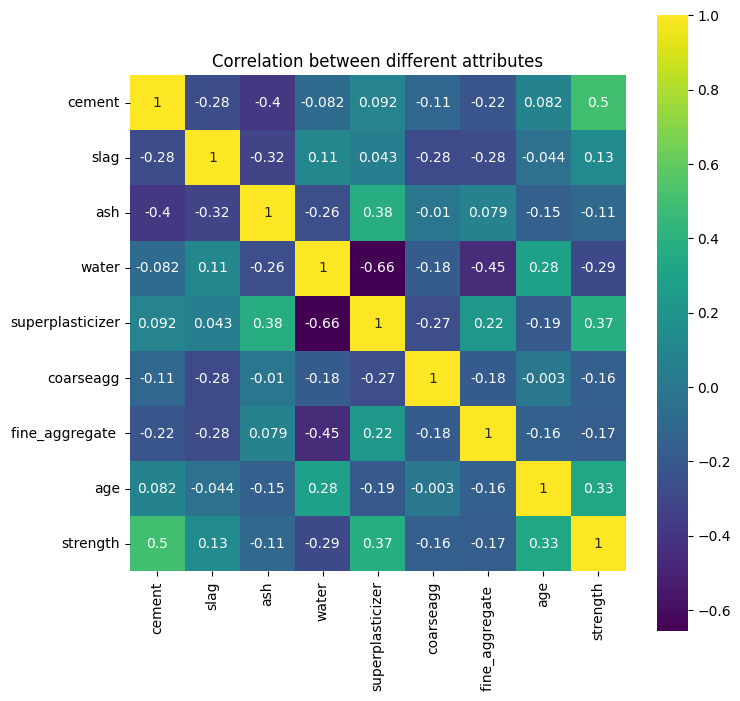

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Axes: >

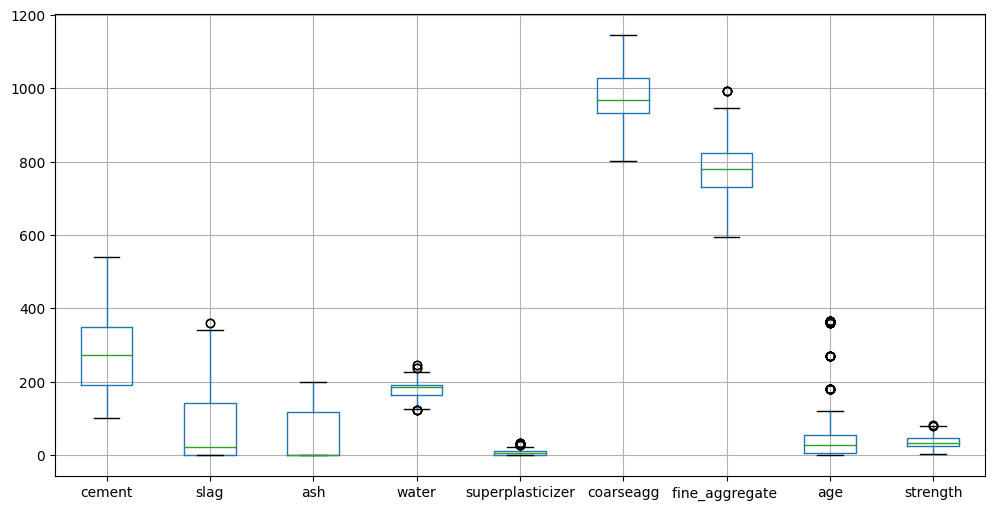

In [ ]:
df.boxplot(figsize=(12,6))

In [ ]:
def count_outliers(column):
    q1, q3 = column.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Loop over each column in the DataFrame and print the count of outliers
for col in df.columns:
    num_outliers = count_outliers(df[col])
    print(f"Column \033[1m{col}\033[0m has {num_outliers} outliers.")

Column cement has 0 outliers.
Column slag has 2 outliers.
Column ash has 0 outliers.
Column water has 9 outliers.
Column superplasticizer has 10 outliers.
Column coarseagg has 0 outliers.
Column fine_aggregate  has 5 outliers.
Column age has 59 outliers.
Column strength has 4 outliers.


**Replacing the outliers by median**

In [ ]:
for col in df.columns[:-1]:
  q1, q3 = df[col].quantile([0.25, 0.75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = df[col].median()

In [ ]:
x = df.drop('strength', axis = 1)
y= df['strength']

In [ ]:
from scipy.stats import zscore
x = x.apply(zscore)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1234)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.9796193793147754

In [ ]:
model.score(x_test, y_test)

0.9050710477383271

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

24.733815414361285

In [ ]:
from sklearn.metrics import r2_score
acc_r = r2_score(y_test, y_pred)
print(acc_r)

0.9050710477383271


In [ ]:
result1 = pd.DataFrame({'algorithm' : ['random forest'], 'accuracy' : [acc_r] }, index=[1])
result = result1
result

,algorithm,accuracy
1,random forest,0.905071


**KFold cross validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=20, shuffle=True, random_state=1)
k_result = cross_val_score(model, x, y, cv = kfold)
acc_rf = k_result.mean()
print(acc_rf)

0.9114875857694198


In [ ]:
result2 = pd.DataFrame({'algorithm' : ['random forest KFold'], 'accuracy' : [acc_rf] }, index=[2])
result = pd.concat([result,result2])
result


,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.9432639250159606

In [ ]:
model.score(x_test, y_test)

0.9104963154812312

In [ ]:
mean_squared_error(y_test, y_pred)

23.320257508901754

In [ ]:
acc_g = r2_score(y_test, y_pred)
print(acc_g)

0.9104963154812312


In [ ]:
result3 = pd.DataFrame({'algorithm' : ['Gradient Boosting Regressor'], 'accuracy' : [acc_g] }, index=[3])
result = pd.concat([result,result3])
result


,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496


**KFold cross validation**

In [ ]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
g_result = cross_val_score(model, x, y, cv = kfold)
acc_gf = g_result.mean()
print(acc_gf)

0.8984182393928691


In [ ]:
result4 = pd.DataFrame({'algorithm' : ['Gradient Boosting Regressor KFold'], 'accuracy' : [acc_gf] }, index=[4])
result = pd.concat([result,result4])
result


,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418


**Ada Boosting Regressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)

AdaBoostRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.8098259254920853

In [ ]:
model.score(x_test, y_test)

0.7716942930340485

In [ ]:
mean_squared_error(y_test, y_pred)

59.48523690196674

In [ ]:
acc_a = r2_score(y_test, y_pred)
print(acc_a)

0.7716942930340485


In [ ]:
result5 = pd.DataFrame({'algorithm' : ['Ada Boosting Regressor'], 'accuracy' : [acc_a] }, index=[5])
result = pd.concat([result,result5])
result


,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694


**KFold cross validation**

In [ ]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
a_result = cross_val_score(model, x, y, cv = kfold)
acc_af = g_result.mean()
print(acc_af)

0.8984182393928691


In [ ]:
result6 = pd.DataFrame({'algorithm' : ['Ada Boosting Regressor KFold'], 'accuracy' : [acc_af] }, index=[6])
result = pd.concat([result,result6])
result

,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694
6,Ada Boosting Regressor KFold,0.898418


**Bagging Regressor**

In [ ]:
 from sklearn.ensemble import BaggingRegressor
 model = BaggingRegressor()
 model.fit(x_train, y_train)

BaggingRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.9726907757745515

In [ ]:
model.score(x_test, y_test)

0.8925902239868644

In [ ]:
mean_squared_error(y_test, y_pred)

27.985704153604125

In [ ]:
acc_b = r2_score(y_test, y_pred)
print(acc_b)

0.8925902239868644


In [ ]:
result7 = pd.DataFrame({'algorithm' : ['Bagging Regressor'], 'accuracy' : [acc_b] }, index=[7])
result = pd.concat([result,result7])
result

,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694
6,Ada Boosting Regressor KFold,0.898418
7,Bagging Regressor,0.892590


In [ ]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
b_result = cross_val_score(model, x, y, cv = kfold)
acc_bf = b_result.mean()
print(acc_bf)

0.900788659151661


In [ ]:
result8 = pd.DataFrame({'algorithm' : ['Bagging Regressor KFold'], 'accuracy' : [acc_bf] }, index=[8])
result = pd.concat([result,result8])
result

,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694
6,Ada Boosting Regressor KFold,0.898418
7,Bagging Regressor,0.892590
8,Bagging Regressor KFold,0.900789


**XGBoost Regressor**

In [ ]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)

0.9932410887923696

In [ ]:
model.score(x_test, y_test)

0.9123872718562933

In [ ]:
mean_squared_error(y_test, y_pred)

22.82756729350284

In [ ]:
acc_x = r2_score(y_test, y_pred)
print(acc_x)

0.9123872718562933


In [ ]:
result = result.drop(result.index[-1], axis=0)

In [ ]:
result9 = pd.DataFrame({'algorithm' : ['XGBoost Regressor'], 'accuracy' : [acc_x] }, index=[9])
result = pd.concat([result,result9])
result

,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694
6,Ada Boosting Regressor KFold,0.898418
8,Bagging Regressor KFold,0.900789
9,XGBoost Regressor,0.912387


In [ ]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1)
x_result = cross_val_score(model, x, y, cv = kfold)
acc_xf = x_result.mean()
print(acc_xf)

0.9303197182579991


In [ ]:
result10 = pd.DataFrame({'algorithm' : ['XGBoost Regressor KFold'], 'accuracy' : [acc_xf] }, index=[10])
result = pd.concat([result,result10])
result

,algorithm,accuracy
1,random forest,0.905071
2,random forest KFold,0.911488
3,Gradient Boosting Regressor,0.910496
4,Gradient Boosting Regressor KFold,0.898418
5,Ada Boosting Regressor,0.771694
6,Ada Boosting Regressor KFold,0.898418
8,Bagging Regressor KFold,0.900789
9,XGBoost Regressor,0.912387
10,XGBoost Regressor KFold,0.930320
